In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
dataset = pd.read_csv("Dataset/CrimeData.csv")
dataset #checking if it is loaded correctly

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION
0,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,745.0,998.0,5400 CORTEEN PL
1,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,Central,163,1,"RAPE, FORCIBLE",25,F,Hispanic/Laotianatin/Mexican,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,121.0,998.0,700 S BROADWAY
2,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,Hispanic/Laotianatin/Mexican,DEPARTMENT STORE,NaN,Invest Cont,442.0,998.0,700 S FIGUEROA ST
3,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,Central,155,2,OTHER MISCELLANEOUS CRIME,0,X,Unknown,POLICE FACILITY,NaN,Invest Cont,946.0,998.0,200 E 6TH ST
4,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,M,Black,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,341.0,998.0,700 BERNARD ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55702,231900583,02/18/2023 12:00:00 AM,02/18/2023 12:00:00 AM,1205,Mission,1924,1,ROBBERY,0,X,Unknown,JEWELRY STORE,SEMI-AUTOMATIC PISTOL,Invest Cont,210.0,998.0,14700 RINALDI ST
55703,231609634,06/28/2023 12:00:00 AM,06/28/2023 12:00:00 AM,1900,Foothill,1634,1,ARSON,36,F,Black,PARK/PLAYGROUND,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,648.0,998.0,11700 FOOTHILL BL
55704,231900561,02/13/2023 12:00:00 AM,02/12/2023 12:00:00 AM,1730,Mission,1956,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",33,F,Hispanic/Laotianatin/Mexican,SINGLE FAMILY DWELLING,BLUNT INSTRUMENT,Adult Arrest,740.0,998.0,10000 SALOMA AV
55705,232105737,02/16/2023 12:00:00 AM,02/16/2023 12:00:00 AM,1806,Topanga,2156,1,ROBBERY,37,M,Unknown,DEPARTMENT STORE,STUN GUN,Invest Cont,210.0,998.0,21900 VANOWEN ST


In [23]:
#Preparation for monthly counts crime rate
dataset["Date Rptd"] = pd.to_datetime(dataset["Date Rptd"], format="%m/%d/%Y %I:%M:%S %p")
dataset["DATE OCC"] = pd.to_datetime(dataset["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p")
monthly_counts_date_rptd = dataset.resample('ME', on="Date Rptd").size().reset_index(name='counts')
monthly_counts_date_occ = dataset.resample('ME', on="DATE OCC").size().reset_index(name='counts')

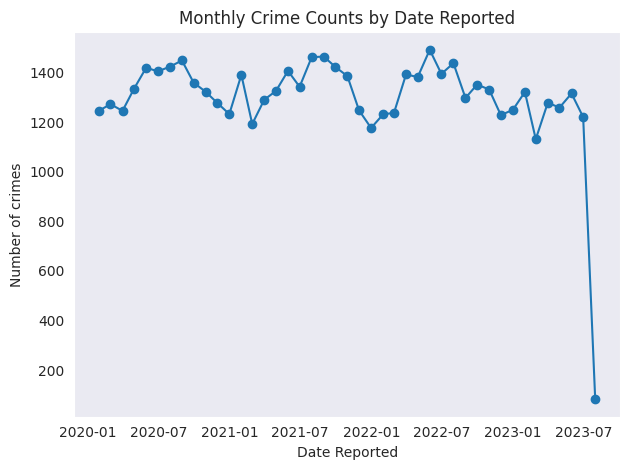

In [25]:
#Monthly Counts for Date Reported
plt.plot(monthly_counts_date_rptd['Date Rptd'], monthly_counts_date_rptd['counts'],marker='o', linestyle="-")
plt.title("Monthly Crime Counts by Date Reported")
plt.xlabel("Date Reported")
plt.ylabel("Number of crimes")
plt.grid()
plt.tight_layout()
plt.show()

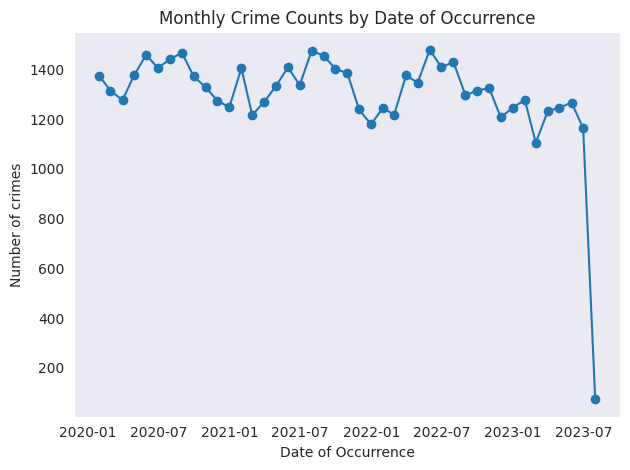

In [26]:
plt.plot(monthly_counts_date_occ['DATE OCC'], monthly_counts_date_occ['counts'],marker='o', linestyle="-")
plt.title("Monthly Crime Counts by Date of Occurrence")
plt.xlabel("Date of Occurrence")
plt.ylabel("Number of crimes")
plt.grid()
plt.tight_layout()
plt.show()

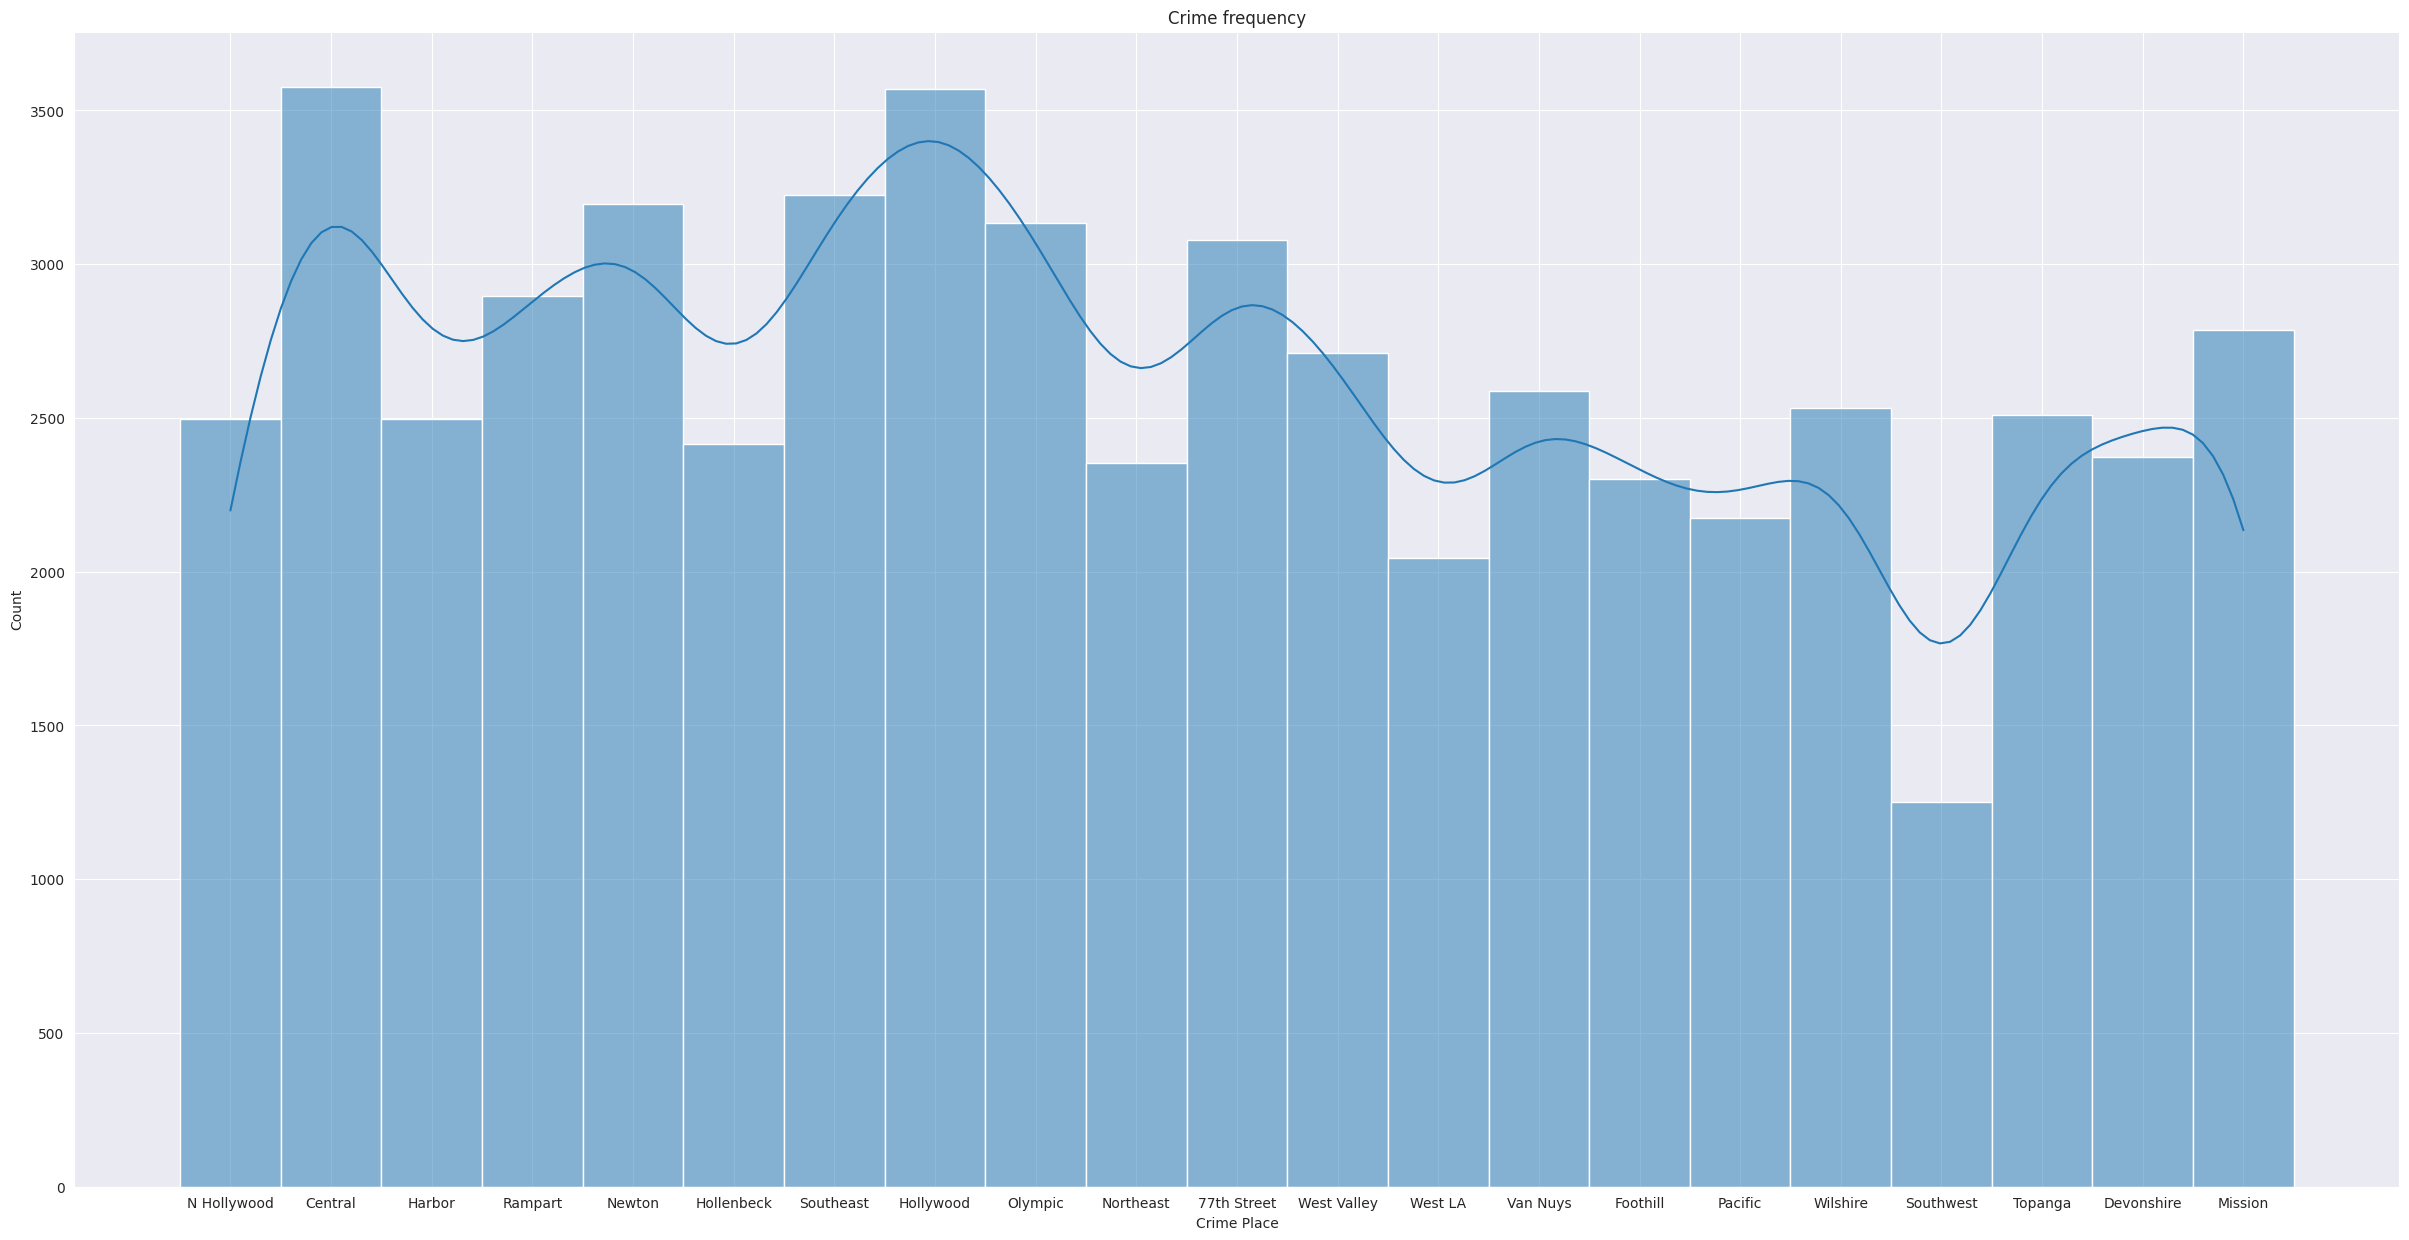

In [16]:
plt.figure(figsize=(30, 15))
sns.histplot(dataset["AREA NAME"], kde=True)
plt.title("Crime frequency")
plt.xlabel("Crime Place")
plt.ylabel("Count")
plt.show()